 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_csvpath)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csvpath = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_csvpath)

algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csvpath = Path("./Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_csvpath)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
#replacing '$' with '' so I can set it to a float variable
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')

#setting datetime format and also setting it to the new index
sp500_df['Date'] = pd.to_datetime(sp500_df["Date"], dayfirst = True)
sp500_df.set_index(sp500_df['Date'], inplace=True)
sp500_df.drop(columns=['Date'],inplace=True)
#allowing the dates to appear in chronological order
sp500_df = sp500_df.sort_values("Date", ascending=True)

sp500_df.head(10)

/var/folders/hb/jxl_pgl57jl8c0k452yj_5km0000gn/T/ipykernel_15112/2166038938.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500 Close"})
sp500_returns_df.head()

,S&P500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

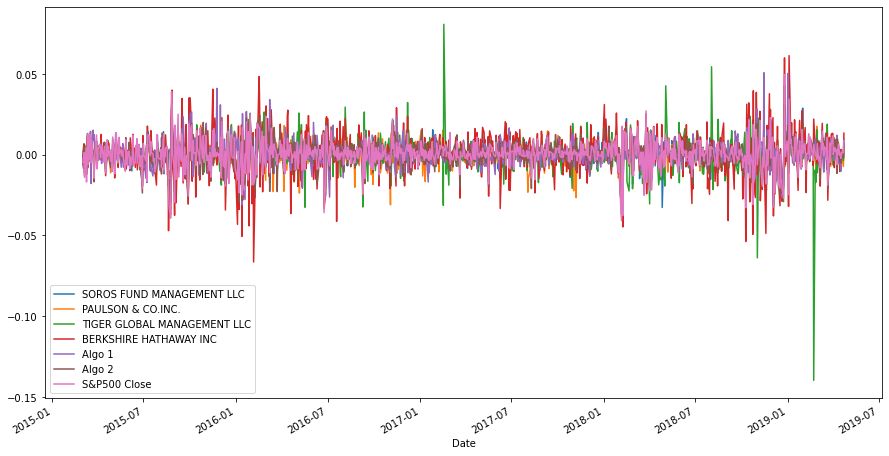

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

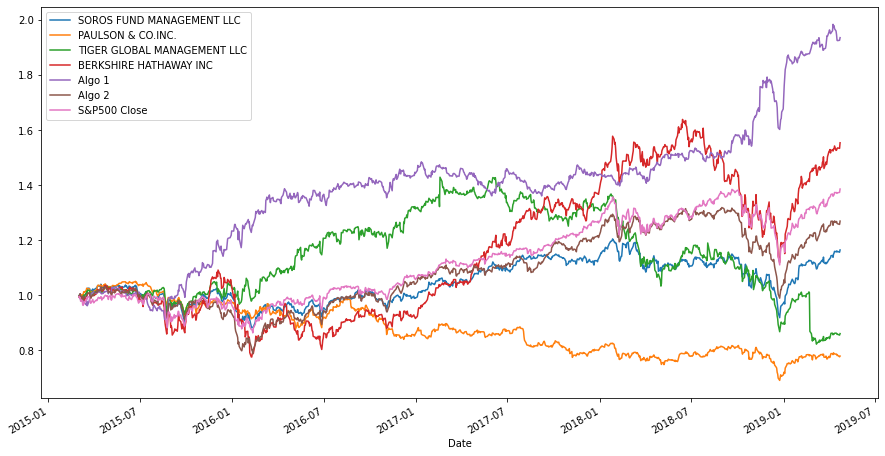

In [16]:
# Calculate cumulative returns of all portfolios
combined_df_creturns = (1 + combined_df).cumprod()
combined_df_creturns.head()
# Plot cumulative returns
combined_df_creturns.plot(figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

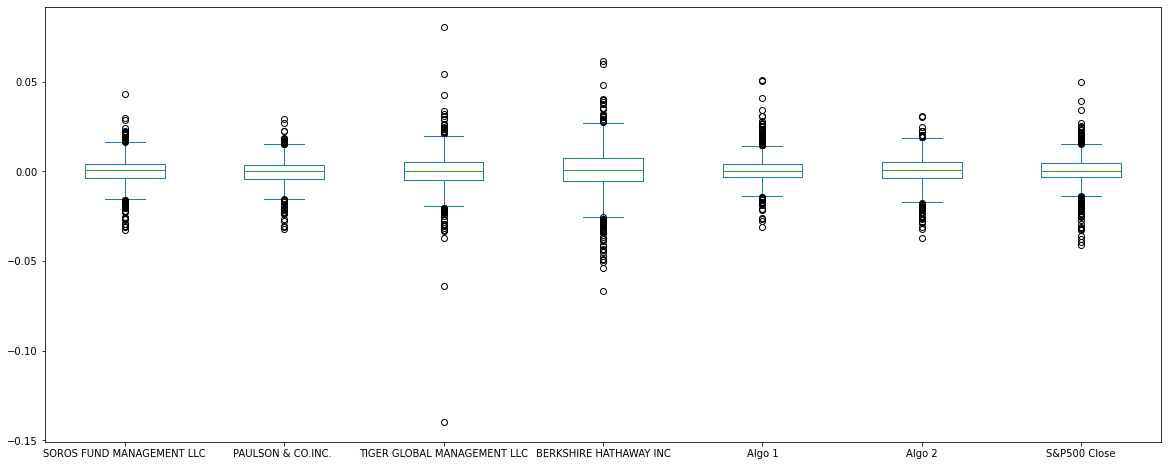

In [17]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,8))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
combined_df_daily_std = combined_df.std()
combined_df_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500 Close                   0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = combined_df_daily_std["S&P500 Close"]
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = combined_df_daily_std > daily_std_sp500 
riskier_than_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500 Close                   False
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_daily_std *np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500 Close                   0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Std. Dev'}, xlabel='Date'>

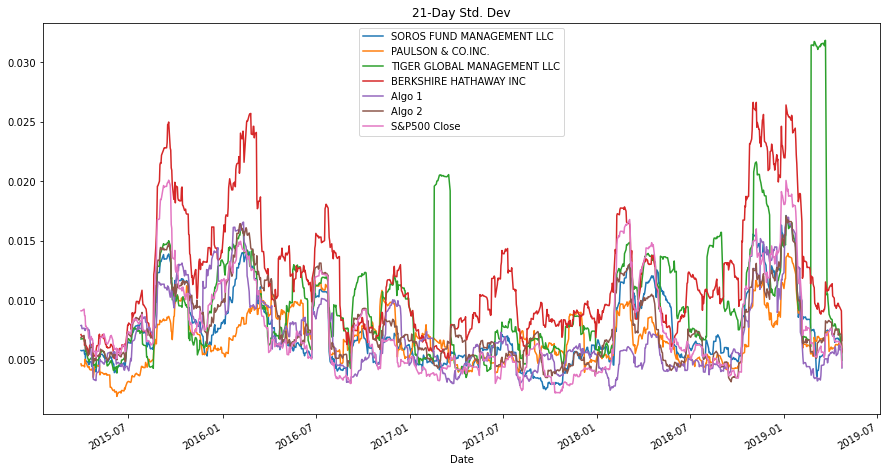

In [58]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_21day_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df_21day_std.plot(title="21-Day Std. Dev", figsize=(15,8))

### Calculate and plot the correlation

In [60]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

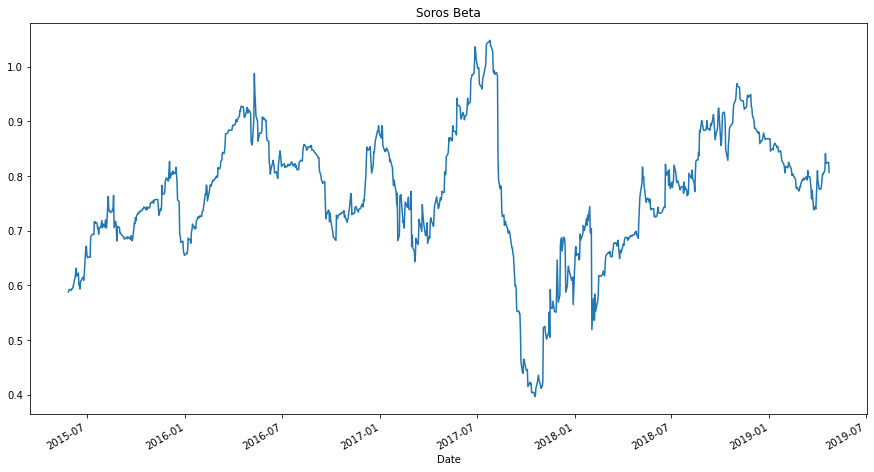

In [63]:
# Calculate covariance of a single portfolio
soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df['S&P500 Close'])
soros_covariance
# Calculate variance of S&P 500
sp500_var = combined_df["S&P500 Close"].rolling(window=60).var()
# Computing beta
soros_beta = soros_covariance / sp500_var
# Plot beta trend
algo_2_beta_plot = soros_beta.plot(figsize=(15, 8), title="Soros Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

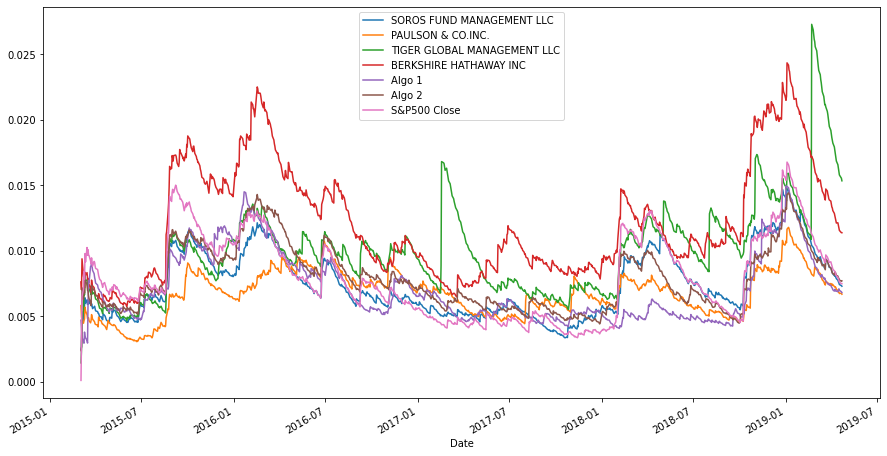

In [62]:
# Use `ewm` to calculate the rolling window
rolling_window = combined_df.ewm(halflife=21, adjust=True).std().plot(figsize=(15, 8))
rolling_window

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500 Close                   0.648267
dtype: float64

<AxesSubplot:>

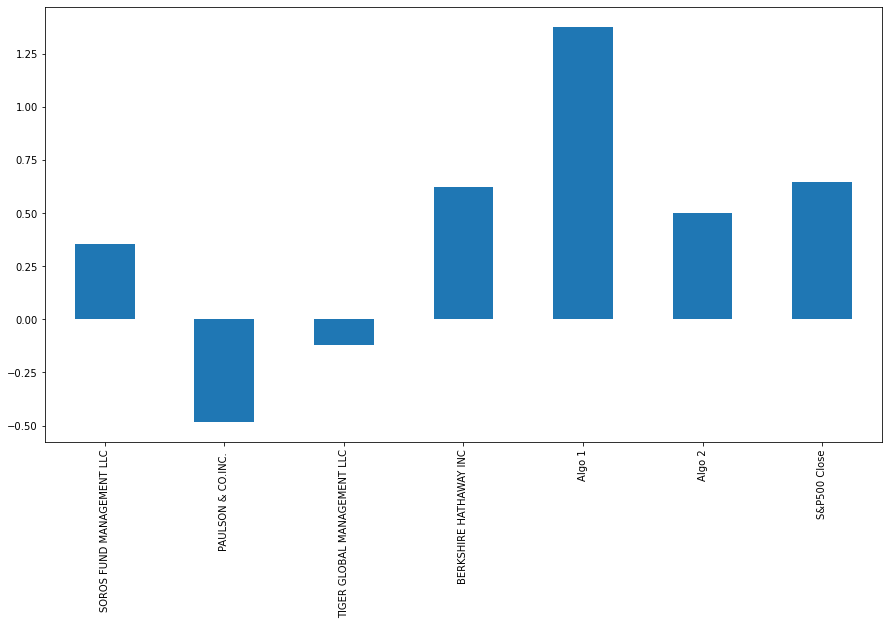

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(15,8))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! Algo 1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [149]:
# Reading data from 1st stock
aapl_csvpath = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csvpath)
aapl_df = aapl_df.rename(columns={"Trade DATE":"Date"})
aapl_df['Date'] = pd.to_datetime(aapl_df["Date"], dayfirst = True)
aapl_df.set_index(aapl_df['Date'], inplace=True)
aapl_df.drop(columns=['Date'],inplace=True)
aapl_df.head()

,Symbol,NOCP
Date,,
2019-09-05,AAPL,200.72
2019-08-05,AAPL,202.90
2019-07-05,AAPL,202.86
2019-06-05,AAPL,208.48
2019-03-05,AAPL,211.75


In [150]:
# Reading data from 2nd stock
cost_csvpath = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csvpath)
cost_df = cost_df.rename(columns={"Trade DATE":"Date"})
cost_df['Date'] = pd.to_datetime(cost_df["Date"], dayfirst = True)
cost_df.set_index(cost_df['Date'], inplace=True)
cost_df.drop(columns=['Date'],inplace=True)
cost_df.head()

,Symbol,NOCP
Date,,
2019-09-05,COST,243.47
2019-08-05,COST,241.34
2019-07-05,COST,240.18
2019-06-05,COST,244.23
2019-03-05,COST,244.62


In [151]:
# Reading data from 3rd stock
goog_csvpath = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csvpath)
goog_df = goog_df.rename(columns={"Trade DATE":"Date"})
goog_df['Date'] = pd.to_datetime(goog_df["Date"], dayfirst = True)
goog_df.set_index(goog_df['Date'], inplace=True)
goog_df.drop(columns=['Date'],inplace=True)
goog_df.head()

,Symbol,NOCP
Date,,
2019-09-05,GOOG,1162.38
2019-08-05,GOOG,1166.27
2019-07-05,GOOG,1174.10
2019-06-05,GOOG,1189.39
2019-03-05,GOOG,1185.40


In [152]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([aapl_df,cost_df, goog_df], axis='columns', join='inner')
portfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Date,,,,,,
2019-09-05,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-08-05,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-07-05,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-06-05,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-03-05,AAPL,211.75,COST,244.62,GOOG,1185.40


In [153]:
# Reset Date index
portfolio_df.index = portfolio_df.index.normalize()

In [154]:
# Reorganize portfolio data by having a column per symbol
portfolio_df.dropna(inplace=True)
portfolio_df.drop(columns=['Symbol'], inplace=True)
portfolio_df.columns = ['AAPL', 'COST', 'GOOG']

portfolio_df.head()

,AAPL,COST,GOOG
Date,,,
2019-09-05,200.72,243.47,1162.38
2019-08-05,202.90,241.34,1166.27
2019-07-05,202.86,240.18,1174.10
2019-06-05,208.48,244.23,1189.39
2019-03-05,211.75,244.62,1185.40


In [155]:
# Calculate daily returns
portfolio_returns_df = portfolio_df.pct_change()
# Drop NAs
portfolio_returns_df.dropna(inplace=True)
# Display sample data
portfolio_returns_df.head(10)

,AAPL,COST,GOOG
Date,,,
2019-08-05,0.010861,-0.008749,0.003347
2019-07-05,-0.000197,-0.004806,0.006714
2019-06-05,0.027704,0.016862,0.013023
2019-03-05,0.015685,0.001597,-0.003355
2019-02-05,-0.012279,-0.007890,-0.019226
2019-01-05,0.006550,-0.004533,0.004705
2019-04-30,-0.046789,0.016309,0.017465
2019-04-29,0.019634,-0.005091,0.083384
2019-04-26,-0.001515,-0.001883,-0.011960


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [156]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = portfolio_returns_df.dot(weights)
# Display sample data
portfolio_weighted_returns = portfolio_weighted_returns.rename("My Returns")
portfolio_weighted_returns.head(10)

Date
2019-08-05    0.001820
2019-07-05    0.000570
2019-06-05    0.019196
2019-03-05    0.004642
2019-02-05   -0.013131
2019-01-05    0.002241
2019-04-30   -0.004339
2019-04-29    0.032642
2019-04-26   -0.005120
2019-04-25    0.001745
Name: My Returns, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [134]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_portfolio = pd.concat([portfolio_weighted_returns, combined_df], axis='columns', join='inner')
new_combined_portfolio.head()

,My Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,,
2018-01-08,0.083475,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-10,0.062761,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112
2018-01-11,-0.049511,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034
2018-02-07,-0.066034,-0.001689,0.002048,-0.007242,-0.005467,-0.001485,0.001598,-0.005002
2018-02-08,0.086211,-0.026591,-0.023493,-0.029651,-0.044806,-0.005913,-0.025095,-0.037536


In [157]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_portfolio.dropna(inplace=True)
new_combined_portfolio

,My Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,,
2018-01-08,0.083475,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-10,0.062761,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112
2018-01-11,-0.049511,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034
2018-02-07,-0.066034,-0.001689,0.002048,-0.007242,-0.005467,-0.001485,0.001598,-0.005002
2018-02-08,0.086211,-0.026591,-0.023493,-0.029651,-0.044806,-0.005913,-0.025095,-0.037536
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [158]:
# Calculate the annualized `std`
combined_portfolios_annualized_std = new_combined_portfolio.std().sort_values(ascending=False) *np.sqrt(252)
combined_portfolios_annualized_std.sort_values(ascending=False)

My Returns                     0.766739
BERKSHIRE HATHAWAY INC         0.250940
TIGER GLOBAL MANAGEMENT LLC    0.224543
S&P500 Close                   0.161504
SOROS FUND MANAGEMENT LLC      0.152283
Algo 2                         0.139571
Algo 1                         0.138593
PAULSON & CO.INC.              0.120510
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Std Dev'}, xlabel='Date'>

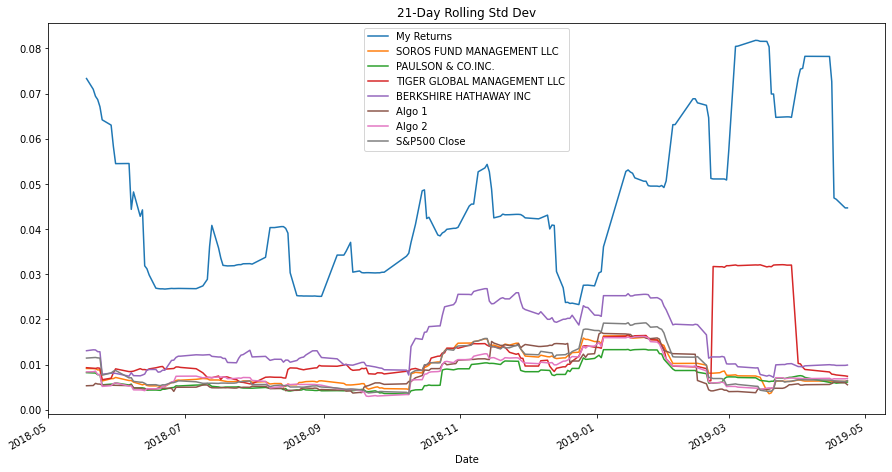

In [161]:
# Calculate rolling standard deviation
rolling_std_dev = new_combined_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_dev.plot(title="21-Day Rolling Std Dev", figsize=(15, 8))

### Calculate and plot the correlation

In [163]:
# Calculate and plot the correlation
correlation_2 = new_combined_portfolio.corr()
correlation_2

,My Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
My Returns,1.000000,0.091399,0.133224,0.103847,0.114625,0.113726,0.146786,0.127562
SOROS FUND MANAGEMENT LLC,0.091399,1.000000,0.810510,0.497490,0.842391,0.380556,0.870269,0.890928
PAULSON & CO.INC.,0.133224,0.810510,1.000000,0.467022,0.692197,0.378973,0.801429,0.801052
TIGER GLOBAL MANAGEMENT LLC,0.103847,0.497490,0.467022,1.000000,0.335925,0.146781,0.407981,0.485174
BERKSHIRE HATHAWAY INC,0.114625,0.842391,0.692197,0.335925,1.000000,0.364772,0.817208,0.881625
Algo 1,0.113726,0.380556,0.378973,0.146781,0.364772,1.000000,0.397722,0.337300
Algo 2,0.146786,0.870269,0.801429,0.407981,0.817208,0.397722,1.000000,0.880073
S&P500 Close,0.127562,0.890928,0.801052,0.485174,0.881625,0.337300,0.880073,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

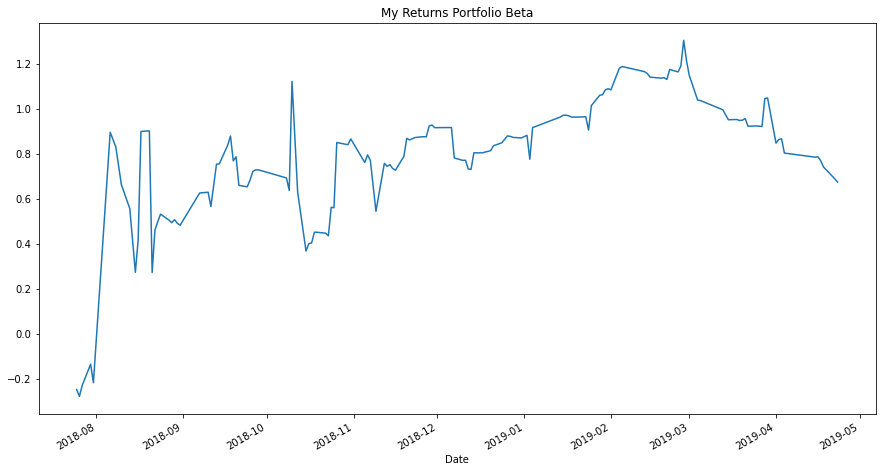

In [168]:
# Calculate and plot Beta
my_returns_covariance = new_combined_portfolio['My Returns'].rolling(window=60).cov(new_combined_portfolio['S&P500 Close'])
# Calculate variance of all daily returns vs. S&P 500
variance_2 = new_combined_portfolio['S&P500 Close'].rolling(window=60).var()
# Calculate beta of all daily returns 
my_returns_beta = my_returns_covariance / variance_2
my_returns_plot = my_returns_beta.plot(figsize=(15, 8), title="My Returns Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratios = (new_combined_portfolio.mean() * 252) / (new_combined_portfolio.std() * np.sqrt(252))
portfolio_sharpe_ratios.sort_values(ascending=False)


Algo 1                         1.664576
My Returns                     0.631316
SOROS FUND MANAGEMENT LLC      0.551982
S&P500 Close                   0.495845
BERKSHIRE HATHAWAY INC         0.494078
PAULSON & CO.INC.              0.184262
Algo 2                         0.077980
TIGER GLOBAL MANAGEMENT LLC   -1.109540
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

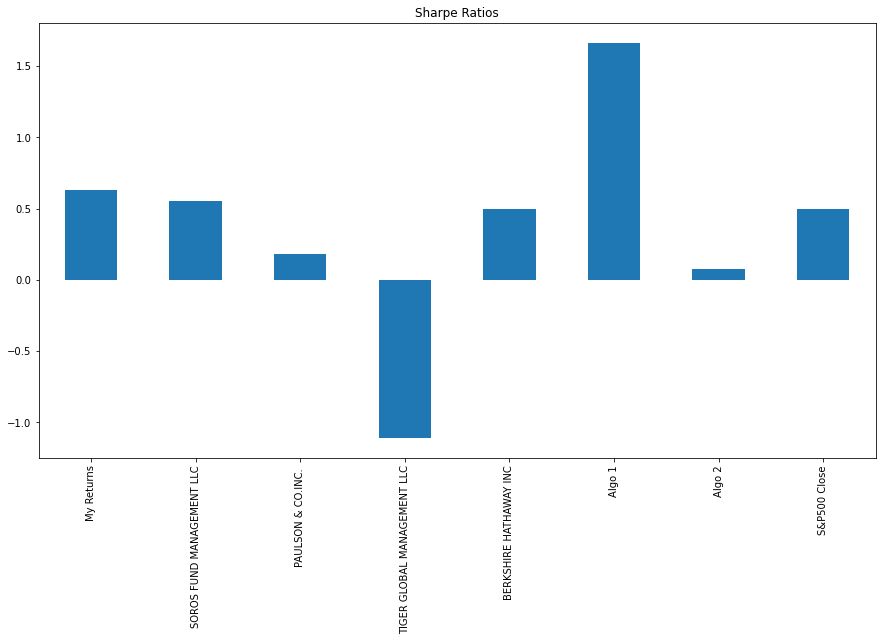

In [172]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(15,8))

### How does your portfolio do?

Write your answer here!

In [175]:
#My profoilio has by far the highest standard deviation, but the second 
#highest sharpe ratio after algo1. My portfolio is certainly a risky set of stocks
#for any investor to add to their portfolio